In [1]:
'''
【课程2.3】  数据归一化/标准化
'''

'\n【课程2.3】  数据归一化/标准化\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# 数据标准化
# （1）0-1标准化
# 将数据的最大最小值记录下来，并通过Max-Min作为基数（即Min=0，Max=1）进行数据的归一化处理
# x = (x - Min) / (Max - Min)

df = pd.DataFrame({"value1":np.random.rand(10)*20,
                  'value2':np.random.rand(10)*100})
print(df.head())
print('------')
# 创建数据

def data_norm(df,*cols):
    df_n = df.copy()
    for col in cols:
        ma = df_n[col].max()
        mi = df_n[col].min()
        df_n[col + '_n'] = (df_n[col] - mi) / (ma - mi)
    return(df_n)
# 创建函数，标准化数据

df_n = data_norm(df,'value1','value2')
print(df_n.head())
# 标准化数据

      value1     value2
0  15.293507  28.915693
1   5.717557  83.715579
2  13.404003  78.149655
3   7.056900  48.297764
4  19.637550   7.915890
------
      value1     value2  value1_n  value2_n
0  15.293507  28.915693  0.702824  0.235459
1   5.717557  83.715579  0.047735  0.849898
2  13.404003  78.149655  0.573564  0.787491
3   7.056900  48.297764  0.139359  0.452779
4  19.637550   7.915890  1.000000  0.000000


In [4]:
# 数据标准化
# （2）Z-score标准化
# Z分数（z-score）,是一个分数与平均数的差再除以标准差的过程 → z=(x-μ)/σ，其中x为某一具体分数，μ为平均数，σ为标准差
# Z值的量代表着原始分数和母体平均值之间的距离，是以标准差为单位计算。在原始分数低于平均值时Z则为负数，反之则为正数
# 数学意义：一个给定分数距离平均数多少个标准差?

df = pd.DataFrame({"value1":np.random.rand(10) * 100,
                  'value2':np.random.rand(10) * 100})
print(df.head())
print('------')
# 创建数据

def data_Znorm(df, *cols):
    df_n = df.copy()
    for col in cols:
        u = df_n[col].mean()
        std = df_n[col].std()
        df_n[col + '_Zn'] = (df_n[col] - u) / std
    return(df_n)
# 创建函数，标准化数据

df_z = data_Znorm(df,'value1','value2')
u_z = df_z['value1_Zn'].mean()
std_z = df_z['value1_Zn'].std()
print(df_z)
print('标准化后value1的均值为:%.2f, 标准差为：%.2f' % (u_z, std_z))
# 标准化数据
# 经过处理的数据符合标准正态分布，即均值为0，标准差为1

# 什么情况用Z-score标准化：
# 在分类、聚类算法中，需要使用距离来度量相似性的时候，Z-score表现更好

      value1     value2
0  64.536821  74.610142
1  24.680001  20.862805
2  34.030967  56.612011
3  12.748111  75.674433
4   0.167241  50.859500
------
      value1     value2  value1_Zn  value2_Zn
0  64.536821  74.610142   0.785756   0.756491
1  24.680001  20.862805  -0.475269  -1.618229
2  34.030967  56.612011  -0.179415  -0.038721
3  12.748111  75.674433  -0.852781   0.803515
4   0.167241  50.859500  -1.250825  -0.292884
5  45.882795  56.936225   0.195563  -0.024396
6  90.878030  28.559640   1.619162  -1.278159
7   9.458966  92.156408  -0.956846   1.531738
8  28.730748  75.959216  -0.347108   0.816097
9  85.903163  42.653466   1.461763  -0.655452
标准化后value1的均值为:0.00, 标准差为：1.00


,value1,value2,value1_n,value2_n,f
H,20.274597,87.863334,1.000000,0.859676,0.943870
G,20.046934,87.227169,0.985593,0.850666,0.931623
F,14.333373,85.815777,0.624037,0.830677,0.706693
I,9.872821,97.771381,0.341771,1.000000,0.605062
J,15.988183,40.599436,0.728754,0.190295,0.513370
B,9.574525,71.952414,0.322894,0.634336,0.447471
D,4.471935,95.984400,0.000000,0.974692,0.389877
C,10.616324,27.163022,0.388820,0.000000,0.233292
E,5.967877,47.018557,0.094664,0.281207,0.169281
A,5.267002,35.999079,0.050312,0.125142,0.080244


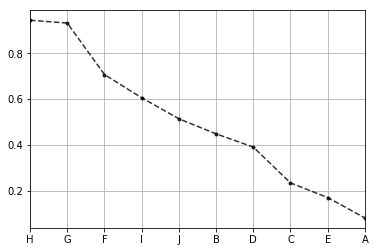

In [9]:
# 案例应用
# 八类产品的两个指标value1，value2，其中value1权重为0.6，value2权重为0.4
# 通过0-1标准化，判断哪个产品综合指标状况最好

df = pd.DataFrame({"value1":np.random.rand(10) * 30,
                  'value2':np.random.rand(10) * 100},
                 index = list('ABCDEFGHIJ'))
#print(df.head())
#print('------')
# 创建数据"

df_n1 = data_norm(df,'value1','value2')
# 进行标准化处理

df_n1['f'] = df_n1['value1_n'] * 0.6 + df_n1['value2_n'] * 0.4
df_n1.sort_values(by = 'f',inplace=True,ascending=False)
df_n1['f'].plot(kind = 'line', style = '--.k', alpha = 0.8, grid = True)
df_n1
# 查看综合指标状况